In [1]:
#11.1 Cross-Validating Models
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
digits = datasets.load_digits()

features = digits.data
target = digits.target
standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = cross_val_score(pipeline, 
 features, 
target,
cv=kf, 
 scoring="accuracy", 
 n_jobs=-1) 

In [2]:
cv_results.mean()

0.9693916821849783

In [3]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [4]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
 features, target, test_size=0.1, random_state=1)
standardizer.fit(features_train)
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)
pipeline = make_pipeline(standardizer, logit)
cv_results = cross_val_score(pipeline, 
 features, 
target, 
cv=kf, 
 scoring="accuracy", 
 n_jobs=-1)

In [1]:
#11.2
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
boston = load_boston()
features, target = boston.data, boston.target
features_train, features_test, target_train, target_test = train_test_split(
 features, target, random_state=0)


In [2]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

-0.001119359203955339

In [3]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(features_train, target_train)
ols.score(features_test, target_test)

0.6354638433202129

In [5]:
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)
clf.score(features_test, target_test)

-0.06510502029325727

In [6]:
#11.3
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [7]:
iris = load_iris()
features, target = iris.data, iris.target
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)


In [8]:
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

0.42105263157894735

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(features_train, target_train)
classifier.score(features_test, target_test)

0.9736842105263158

In [10]:
#11.4
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples = 10000,
 n_features = 3,
 n_informative = 3,
 n_redundant = 0,
 n_classes = 2,
 random_state = 1)
logit = LogisticRegression()
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [12]:
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [13]:
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [14]:
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [16]:

X_train, X_test, y_train, y_test = train_test_split(X,
 y,
test_size=0.1,
random_state=1)

In [17]:
y_hat = logit.fit(X_train, y_train).predict(X_test)

In [18]:
accuracy_score(y_test, y_hat)

0.947

In [19]:
#11.5
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [20]:
features, target = make_classification(n_samples=10000,
 n_features=10,
n_classes=2,
n_informative=3,
random_state=3)

In [21]:
features_train, features_test, target_train, target_test = train_test_split(
 features, target, test_size=0.1, random_state=1)

In [22]:
logit = LogisticRegression()
logit.fit(features_train, target_train)
target_probabilities = logit.predict_proba(features_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
 target_probabilities)

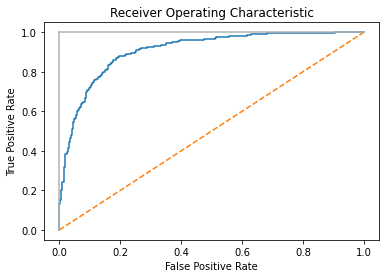

In [23]:
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [24]:
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [25]:
logit.classes_

array([0, 1])

In [26]:
print("Threshold:", threshold[116])
print("True Positive Rate:", true_positive_rate[116])
print("False Positive Rate:", false_positive_rate[116])

Threshold: 0.5331715230155317
True Positive Rate: 0.810204081632653
False Positive Rate: 0.14901960784313725


In [27]:
print("Threshold:", threshold[45])
print("True Positive Rate:", true_positive_rate[45])
print("False Positive Rate:", false_positive_rate[45])

Threshold: 0.8189133876659292
True Positive Rate: 0.5448979591836735
False Positive Rate: 0.047058823529411764


In [28]:
#11.6
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [29]:
features, target = make_classification(n_samples = 10000,
 n_features = 3,
 n_informative = 3,
 n_redundant = 0,
 n_classes = 3,
 random_state = 1)

In [30]:
logit = LogisticRegression()

In [31]:
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [32]:
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

In [38]:
#11.7
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [39]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
class_names = iris.target_names
features_train, features_test, target_train, target_test = train_test_split(
 features, target, random_state=1)

In [40]:
classifier = LogisticRegression()
target_predicted = classifier.fit(features_train,
 target_train).predict(features_test)
matrix = confusion_matrix(target_test, target_predicted)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


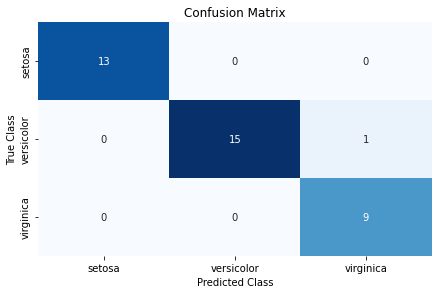

In [41]:
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [42]:
#11.8
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [43]:
features, target = make_regression(n_samples = 100,
 n_features = 3,
 n_informative = 3,
 n_targets = 1,
 noise = 50,
 coef = False,
 random_state = 1)

In [44]:
ols = LinearRegression()
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [45]:
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

In [46]:
#11.9
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [47]:
features, _ = make_blobs(n_samples = 1000,
 n_features = 10,
 centers = 2,
 cluster_std = 0.5,
 shuffle = True,
 random_state = 1)

In [48]:
model = KMeans(n_clusters=2, random_state=1).fit(features)
target_predicted = model.labels_
silhouette_score(features, target_predicted)

0.8916265564072142

In [49]:
#11.10
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

In [50]:
features, target = make_regression(n_samples = 100,
 n_features = 3,
 random_state = 1)

In [51]:
features_train, features_test, target_train, target_test = train_test_split(
 features, target, test_size=0.10, random_state=1)

In [52]:
def custom_metric(target_test, target_predicted):
 r2 = r2_score(target_test, target_predicted)
 return r2
score = make_scorer(custom_metric, greater_is_better=True)

In [53]:
classifier = Ridge()
model = classifier.fit(features_train, target_train)
score(model, features_test, target_test)

0.9997906102882058

In [54]:
target_predicted = model.predict(features_test)
r2_score(target_test, target_predicted)

0.9997906102882058

In [69]:
#11.11
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [70]:
digits = load_digits()
features, target = digits.data, digits.target
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
features,target,
cv=10,
scoring='accuracy',
n_jobs=-1,
 train_sizes=np.linspace(
 0.01,
1.0,
50))

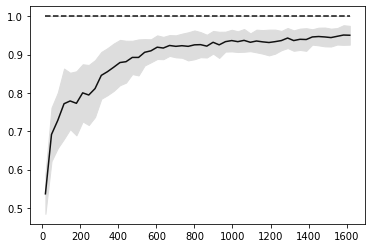

In [71]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std,
 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
 test_mean + test_std, color="#DDDDDD")

No handles with labels found to put in legend.


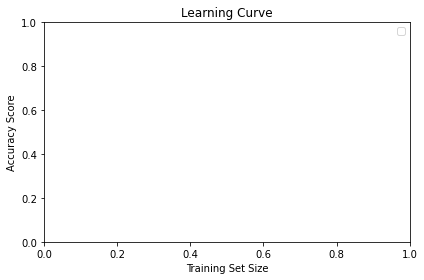

In [72]:
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [73]:
#11.12
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [74]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
class_names = iris.target_names
features_train, features_test, target_train, target_test = train_test_split(
 features, target, random_state=1)
classifier = LogisticRegression()
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
print(classification_report(target_test,
 target_predicted,
target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
#11.13
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [ ]:
digits = load_digits()
features, target = digits.data, digits.target
param_range = np.arange(1, 250, 2)

In [ ]:
train_scores, test_scores = validation_curve(
 RandomForestClassifier(),
 features,
 target,
 param_name="n_estimators",
 param_range=param_range,
 cv=3,
 scoring="accuracy",
 n_jobs=-1)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [ ]:
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std,
 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
 test_mean + test_std, color="gainsboro")

In [ ]:
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()